# 4. Data Preparation 



In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sqlite3

## 4.1 Reading the Data

In [2]:
#reading the movie_budget dataset 
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv")
tn_movie_budgets .head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#reading the rt.reviews dataset
rt_reviews = pd.read_csv("data/rt.reviews.tsv", sep='\t', encoding ='latin-1')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 4.2 Data Exploration

### Exploring the tn_movie_budget dataset

In [4]:
#this prints the overview information of the dataset
tn_movie_budgets.info()
#this prints the number of rows and columns in the dataset
print(tn_movie_budgets.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
(5782, 6)


In [5]:
# Descreptive Analysis on Numeric features
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [6]:
#checking for duplicates
print("Number of duplicates is ", tn_movie_budgets.duplicated().sum())

#checking for missing values
print("Missing values in the dataset")
print(tn_movie_budgets.isna().sum())

Number of duplicates is  0
Missing values in the dataset
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Exploring the rt_reviews dataset

In [7]:
#this gives the overview  information of the dataset
rt_reviews.info()
#this gives the numbers of rows and columns in the dataset
print(rt_reviews.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
(54432, 8)


In [8]:
# Descreptive Analysis on Numeric features
rt_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [9]:
#checking for duplicates
print("number of duplicates in the data", rt_reviews.duplicated().sum())

#checking for missing values
print( "missing values in the dataset")
print(rt_reviews.isna().sum())

number of duplicates in the data 9
missing values in the dataset
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


# 5. Data Cleaning

### 5.1 Cleaning the rt_review dataset
We observed that there are 9 duplicates in our dataset. Moreover, there are 13517 missing values in the rating column and we decided to drop them in both cases to maintain the integrity of the dataset.

In [10]:
# Drop duplicates based on 'rating' column
rt_reviews = rt_reviews.drop_duplicates(subset=['rating'])

In [13]:
# droping missing values in rating columns
# some non-numeric values in the rating column that cannot be converted to float, such as ‘C’. To handle this, you can filter out these invalid values before applying the conversion function.
def is_valid_rating(rating):
    try:
        float(rating)
        return True
    except ValueError:
        if '/' in rating:
            num, denom = rating.split('/')
            try:
                float(num) / float(denom)
                return True
            except ValueError:
                return False
        return False

rt_reviews = rt_reviews[rt_reviews['rating'].apply(is_valid_rating)]
#convert all to string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
#define the conversion function
def convert_rating(rating):
    if '/' in rating:
        num, denom = rating.split('/')
        return float(num) / float(denom) * 10  # Assuming ratings are out of 10
    return float(rating)
rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)
rt_reviews.dropna(subset=['rating'], inplace=True)

# 6. Explanatory Data Analysis

## rt. review dataset
We plotted a bar graph for the top 20 publishers against average ratings and observed that the publishers have different ratings

In [15]:
# some non-numeric values in the rating column that cannot be converted to float, such as ‘C’. To handle this, you can filter out these invalid values before applying the conversion function.
def is_valid_rating(rating):
    try:
        float(rating)
        return True
    except ValueError:
        if '/' in rating:
            num, denom = rating.split('/')
            try:
                float(num) / float(denom)
                return True
            except ValueError:
                return False
        return False

rt_reviews = rt_reviews[rt_reviews['rating'].apply(is_valid_rating)]
#convert all to string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
#define the conversion function
def convert_rating(rating):
    if '/' in rating:
        num, denom = rating.split('/')
        return float(num) / float(denom) * 10  # Assuming ratings are out of 10
    return float(rating)
rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)
rt_reviews.dropna(subset=['rating'], inplace=True)

publisher_ratings = rt_reviews.groupby('publisher')['rating'].mean()

print(publisher_ratings)


publisher
3AW                         2.000000
AARP Movies for Grownups    3.000000
Aisle Seat                  5.000000
Antagony &amp; Ecstasy      7.000000
Apollo Guide                4.250000
                              ...   
honeycuttshollywood.com     9.000000
leonardmaltin.com           6.416667
rec.arts.movies.reviews     3.166667
sbs.com.au                  3.500000
tonymacklin.net             5.000000
Name: rating, Length: 74, dtype: float64


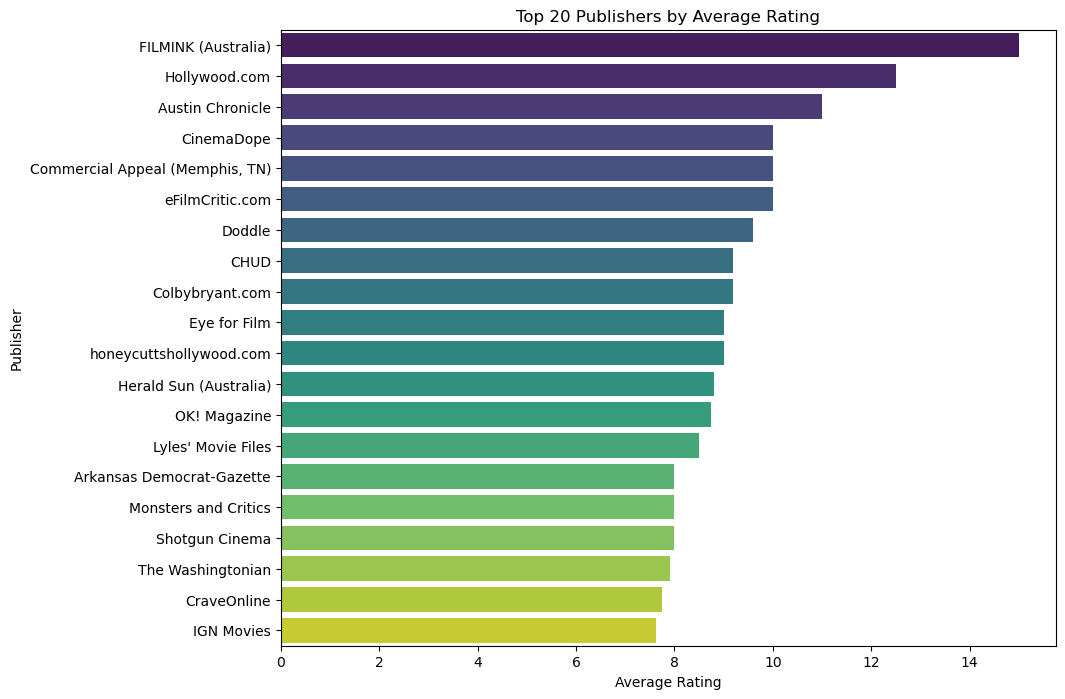

In [16]:
# Get the top 20 publishers by average rating
top_20_rating = publisher_ratings.nlargest(n=20)

# Convert the Series to a DataFrame for seaborn
top_20_df = top_20_rating.reset_index()

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='rating', y='publisher', data=top_20_df, ax=ax, palette='viridis')

# Set axis labels and title
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.title('Top 20 Publishers by Average Rating')
plt.show()